## 실습 공통 준비 사항

모든 실습 문제는 seaborn 라이브러리에 내장된 Iris(붓꽃) 데이터셋을 사용합니다.

아래 코드를 실행하여 데이터를 준비하고, numpy 배열로 변환하여 사용하세요.

In [3]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

# Iris 데이터셋 로드
iris_sns = sns.load_dataset('iris')

# 데이터셋을 특징(X)과 라벨(y)로 분리
features_all = iris_sns.drop('species', axis=1).to_numpy()
labels_all = iris_sns['species'].to_numpy()
feature_names = iris_sns.columns[:-1]

# 데이터 확인
print(f"전체 특징 데이터 shape: {features_all.shape}")
print(f"전체 라벨 데이터 shape: {labels_all.shape}")
print(f"첫 번째 데이터: {features_all[0]}, 라벨: {labels_all[0]}")

전체 특징 데이터 shape: (150, 4)
전체 라벨 데이터 shape: (150,)
첫 번째 데이터: [5.1 3.5 1.4 0.2], 라벨: setosa


In [4]:
iris_sns.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
features_all.shape, labels_all.shape, feature_names.shape

((150, 4), (150,), (4,))

## 실습 문제 1.1: 데이터의 산술 평균 계산하기

**설명**: \*\*평균(mean)\*\*은 주어진 데이터셋의 모든 값을 더한 후 데이터의 개수로 나눈 값으로, 데이터의 중심을 나타내는 가장 기본적인 **기술 통계량**입니다. 150개 Iris 데이터의 '꽃받침 길이'(`sepal_length`) 전체의 산술 평균을 계산하여 이 데이터셋의 중심 경향성을 파악해 보세요.

$$\bar{x} = \frac{1}{n} \sum_{i=1}^{n} x_i$$

**요구사항**:

  - `features_all`에서 첫 번째 열(꽃받침 길이) 데이터를 사용하세요.
  - 이 데이터의 모든 요소를 더하고, 데이터의 개수(150)로 나누어 평균을 계산하는 `calculate_mean` 함수를 완성하세요.
  - 계산된 평균을 출력하여 150개 꽃받침 길이 데이터의 중심 값을 확인합니다.



In [ ]:

def calculate_mean(data: np.ndarray) -> float:
  """
  주어진 numpy 배열의 산술 평균을 계산합니다.

  Args:
    data: 1차원 숫자 데이터가 담긴 numpy 배열

  Returns:
    데이터의 평균값
  """
  if len(data)==0: raise ValueError()
  return sum(data)/len(data)

In [7]:
sepal_length_data = features_all[:, 0]
mean_value = calculate_mean(sepal_length_data)
print(f"붓꽃 데이터의 꽃받침 길이(sepal length)의 평균은? {mean_value:.4f}")

붓꽃 데이터의 꽃받침 길이(sepal length)의 평균은? 5.8433


## 실습 문제 1.2 (개정판): 표본 분산과 `ddof`의 이해

**설명**: \*\*분산(variance)\*\*과 \*\*표준편차(standard deviation)\*\*는 데이터가 평균으로부터 얼마나 흩어져 있는지를 나타내는 **변동성**의 척도입니다. 이번 실습에서는 모집단의 분산을 더 잘 추정하기 위한 \*\*표본 분산(sample variance)\*\*을 계산합니다.

> **💡 왜 n-1로 나눌까요? (자유도)**
> 우리가 가진 데이터는 전체 붓꽃(모집단)에서 추출한 **표본**입니다. 표본의 평균($\\bar{x}$)은 실제 모집단의 평균($\\mu$)과 약간의 차이가 있으며, 이로 인해 분산이 실제보다 작게 계산되는 경향이 있습니다. 분모를 `n` 대신 `n-1`(**자유도**, degrees of freedom)로 사용하면 이 편향을 보정하여, 모집단의 분산을 더 잘 추정할 수 있습니다.

> **⚠️ 라이브러리별 기본값의 함정: `ddof`란?**
> `ddof`는 \*\*"Delta Degrees of Freedom"\*\*의 약자로, 분모에서 `n`으로부터 뺄 값을 지정하는 파라미터입니다.
>
>   - **NumPy (`np.var`)**: 공학, 과학 등 범용 계산에 중점을 두므로, 주어진 데이터를 '모집단'으로 간주하는 `ddof=0` (즉, `n`으로 나누기)을 기본값으로 사용합니다.
>   - **Pandas (`Series.var`)**: 통계 분석을 주 목적으로 하므로, 데이터가 '표본'이라는 가정하에 `ddof=1` (즉, `n-1`로 나누기)을 기본값으로 사용합니다.
>
> 이 차이를 이해하는 것은 정확한 통계 계산을 위해 매우 중요합니다\!

$$s^2 = \frac{1}{n-1} \sum_{i=1}^{n} (x_i - \bar{x})^2 \quad , \quad s = \sqrt{s^2}$$

**요구사항**:

  - '꽃받침 길이' 데이터를 사용하여, 분모를 `n-1`로 나누는 **표본 분산**과 **표본 표준편차**를 계산하는 `calculate_variance_std` 함수를 직접 구현하세요.
  - 구현한 함수의 결과와 `numpy.var()`, `pandas.Series.var()` 함수의 결과를 비교하세요.
  - `numpy.var()`에 `ddof=1` 인자를 전달했을 때, 직접 구현한 결과 및 Pandas의 결과와 일치하는지 확인하여 `ddof`의 역할을 검증하세요.



In [6]:

def calculate_variance_std(data: np.ndarray) -> tuple[float, float]:
  """
  주어진 numpy 배열의 표본 분산(n-1)과 표본 표준편차를 계산합니다.
  """
  if len(data)==0: raise ValueError()
  data_mean = sum(data)/len(data)
  sv = sum((data-data_mean)**2)/(len(data)-1) # 표본 분산 (Sample Variance): 표본 데이터의 각 값들이 평균으로부터 얼마나 떨어져 있는지?
  ssd = np.sqrt(sv) # 표본 표준편차(Sample Standard Deviation): 표본 분산에 제곱근을 취한 값

  return sv, ssd

In [7]:
# 1. 데이터 준비
sepal_length_data = features_all[:, 0]
sepal_length_series = pd.Series(sepal_length_data) # Pandas용 데이터

# 2. 직접 구현한 함수 결과
my_variance, my_std = calculate_variance_std(sepal_length_data)
print("--- 1. 직접 구현한 함수 결과 (n-1로 나눔) ---")
print(f"표본 분산: {my_variance:.6f}")
print(f"표본 표준편차: {my_std:.6f}")

# 3. NumPy 라이브러리 결과 비교
print("\n--- 2. NumPy 결과 비교 ---")
# 기본값(ddof=0)은 n으로 나눈 모분산을 계산
numpy_pop_variance = np.var(sepal_length_data)
print(f"NumPy 모분산 (np.var, ddof=0 기본값): {numpy_pop_variance:.6f}  <-- (결과 다름!)")
# ddof=1 옵션으로 n-1로 나눈 표본 분산을 계산
numpy_sample_variance = np.var(sepal_length_data, ddof=1)
print(f"NumPy 표본 분산 (np.var, ddof=1): {numpy_sample_variance:.6f}  <-- (결과 일치!)")

# 4. Pandas 라이브러리 결과 비교
print("\n--- 3. Pandas 결과 비교 ---")
# 기본값(ddof=1)으로 표본 분산을 계산
pandas_sample_variance = sepal_length_series.var()
print(f"Pandas 표본 분산 (.var(), ddof=1 기본값): {pandas_sample_variance:.6f} <-- (결과 일치!)")

# 5. 최종 검증
print("\n--- 4. 최종 검증 ---")
is_correct = np.isclose(my_variance, numpy_sample_variance) and np.isclose(my_variance, pandas_sample_variance)
print(f"직접 구현한 표본 분산이 NumPy(ddof=1) 및 Pandas의 결과와 일치하는가? {'성공' if is_correct else '실패'}")

--- 1. 직접 구현한 함수 결과 (n-1로 나눔) ---
표본 분산: 0.685694
표본 표준편차: 0.828066

--- 2. NumPy 결과 비교 ---
NumPy 모분산 (np.var, ddof=0 기본값): 0.681122  <-- (결과 다름!)
NumPy 표본 분산 (np.var, ddof=1): 0.685694  <-- (결과 일치!)

--- 3. Pandas 결과 비교 ---
Pandas 표본 분산 (.var(), ddof=1 기본값): 0.685694 <-- (결과 일치!)

--- 4. 최종 검증 ---
직접 구현한 표본 분산이 NumPy(ddof=1) 및 Pandas의 결과와 일치하는가? 성공


## 실습 문제 1.3: 표본 평균의 신뢰도: 표준오차의 이해와 계산

**설명**: \*\*표준오차(Standard Error, SE)\*\*는 "만약 우리가 모집단에서 지금과 같은 크기($n$)의 표본을 여러 번 반복해서 뽑는다면, 그렇게 얻은 **여러 개의 표본 평균($\bar{x}$)들**은 얼마나 흩어져 있을까?"를 추정한 값입니다. 즉, 개별 데이터($x\_i$)의 흩어짐을 나타내는 **표준편차**와 달리, 표준오차는 \*\*통계량인 표본 평균의 변동성(신뢰도)\*\*을 나타냅니다. 표준오차가 작을수록, 우리가 가진 단 하나의 표본 평균이 실제 모집단 평균과 가까울 것이라고 더 강하게 신뢰할 수 있습니다.

$$SE_{\bar{x}} = \frac{s}{\sqrt{n}}$$

**요구사항**:

  - '꽃받침 길이' 데이터에서 30개의 샘플을 무작위로 추출하여 `sample_data`를 만드세요.
  - `sample_data`의 표본 표준편차($s$)와 표본의 크기($n=30$)를 구하세요.
  - 표준편차를 표본 크기의 제곱근으로 나누어 표준오차를 계산하는 `calculate_standard_error` 함수를 완성하세요.



In [8]:

def calculate_standard_error(sample: np.ndarray) -> float:
  """
  주어진 표본 데이터의 표준오차를 계산합니다.

  Args:
    sample: 표본 데이터가 담긴 numpy 배열

  Returns:
    표본 평균의 표준오차
  """
  sv, ssd = calculate_variance_std(sample)
  se = ssd/(np.sqrt(len(sample)))
  return se

In [9]:
sepal_length_data = features_all[:, 0]
sample_data = np.random.choice(sepal_length_data, size=30, replace=False)
standard_error = calculate_standard_error(sample_data)
print(f"꽃받침 길이 30개 표본의 표준오차: {standard_error:.4f}")

꽃받침 길이 30개 표본의 표준오차: 0.1470


## 실습 문제 2.1: 확률변수의 기댓값과 큰 수의 법칙

**설명**: **확률변수**의 \*\*기댓값(Expected Value, E[X])\*\*은 그 변수가 평균적으로 어떤 값을 가질 것인지에 대한 이론적인 값입니다. \*\*큰 수의 법칙(Law of Large Numbers)\*\*에 따르면, 표본의 크기($n$)가 커질수록 우리가 관측한 데이터의 \*\*표본 평균($\bar{x}$)\*\*은 확률변수의 \*\*기댓값($E[X]$)\*\*에 가까워집니다. 따라서 우리는 표본 평균을 이용해 기댓값을 추정할 수 있습니다.

$$n \to \infty \implies \bar{x} \to E[X]$$

**요구사항**:

  - '꽃받침 길이'를 확률변수 $X$로 간주합니다.
  - 전체 '꽃받침 길이' 데이터를 사용하여 확률변수 $X$의 기댓값을 추정하세요. (계산은 1.1의 평균과 동일하지만, '데이터의 평균'이 아닌 '확률변수의 기댓값 추정'이라는 의미에 집중해 보세요.)
  - `estimate_expected_value` 함수를 완성하세요.



In [25]:

def estimate_expected_value(data: np.ndarray) -> float:
  """
  데이터를 바탕으로 확률변수의 기댓값을 추정합니다.

  Args:
    data: 확률변수의 실현값(표본)이 담긴 numpy 배열

  Returns:
    추정된 기댓값
  """
  # 큰 수의 법칙에 따라, 표본 평균은 기댓값의 좋은 추정치입니다.
  return np.mean(data)

In [26]:
sepal_length_data = features_all[:, 0]
expected_value = estimate_expected_value(sepal_length_data)
print(f"'꽃받침 길이' 확률변수 X의 추정된 기댓값 E[X]: {expected_value:.4f}")

'꽃받침 길이' 확률변수 X의 추정된 기댓값 E[X]: 5.8433


## 실습 문제 2.2: 확률변수의 분산과 표준편차 계산하기

**설명**: **확률변수**의 \*\*분산(Var(X))\*\*과 \*\*표준편차($\sigma$)\*\*는 확률변수의 값이 기댓값으로부터 평균적으로 얼마나 떨어져 있는지를 나타내는 척도입니다. 즉, 확률변수 자체의 내재된 변동성을 의미합니다. `sepal_length_data`를 이용해 '꽃받침 길이' 확률변수 $X$의 분산을 추정해 보세요.

$$Var(X) \approx s^2 = \frac{1}{n-1} \sum_{i=1}^{n} (x_i - E[X])^2$$

**요구사항**:

  - '꽃받침 길이' 확률변수 $X$의 기댓값($E[X]$)을 먼저 추정해야 합니다.
  - 각 데이터 값과 기댓값의 차이를 제곱하여 모두 더한 뒤, '데이터 개수 - 1'로 나누어 분산을 추정하세요.
  - 분산에 제곱근을 취하여 표준편차를 계산하는 `estimate_variance_std` 함수를 완성하세요.



In [19]:

def estimate_variance_std(data: np.ndarray) -> tuple[float, float]:
  """
  데이터를 바탕으로 확률변수의 분산과 표준편차를 추정합니다.

  Args:
    data: 확률변수의 실현값(표본)이 담긴 numpy 배열

  Returns:
    (추정된 분산, 추정된 표준편차)를 담은 튜플
  """
  # 표본 분산과 표준편차는 확률변수의 분산과 표준편차의 좋은 추정치입니다.
  # 확률변수의 기댓값
  data_mean = np.sum(data)/len(data)

  sv = sum((data-data_mean)**2)/(len(data)-1) # 표본 분산 (Sample Variance): 표본 데이터의 각 값들이 평균으로부터 얼마나 떨어져 있는지?
  ssd = np.sqrt(sv) # 표본 표준편차(Sample Standard Deviation): 표본 분산에 제곱근을 취한 값

  return sv, ssd

In [20]:
sepal_length_data = features_all[:, 0]
est_variance, est_std_dev = estimate_variance_std(sepal_length_data)

print(f"'꽃받침 길이' 확률변수 X의 추정된 분산 Var(X): {est_variance:.4f}")
print(f"'꽃받침 길이' 확률변수 X의 추정된 표준편차 \u03C3: {est_std_dev:.4f}")

'꽃받침 길이' 확률변수 X의 추정된 분산 Var(X): 0.6857
'꽃받침 길이' 확률변수 X의 추정된 표준편차 σ: 0.8281



## 실습 문제 2.3: 두 확률변수의 관계: 공분산 계산하기

**설명**: \*\*공분산(Covariance)\*\*은 두 확률변수가 함께 움직이는 **방향성**을 나타내는 값입니다.

  - **공분산 \> 0**: 두 변수가 같은 방향으로 움직이는 경향 (하나가 증가할 때, 다른 하나도 증가)
  - **공분산 \< 0**: 두 변수가 반대 방향으로 움직이는 경향 (하나가 증가할 때, 다른 하나는 감소)

공분산의 절댓값 크기만으로는 관계의 강도를 해석하기 어렵지만, 부호를 통해 관계의 방향을 파악할 수 있습니다. '꽃받침 길이'($X$)와 '꽃잎 길이'($Y$)의 공분산을 계산하여 두 변수가 어떤 방향으로 함께 움직이는지 확인해 보세요.

$$\text{cov}(X, Y) = \frac{1}{n-1} \sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})$$

**요구사항**:

  - '꽃받침 길이'와 '꽃잎 길이' 데이터를 사용하세요.
  - 두 변수의 공분산을 계산하는 `calculate_covariance` 함수를 완성하세요.
  - 계산된 공분산 값의 부호를 보고 두 변수의 관계 방향을 해석하세요.



In [27]:

def calculate_covariance(data_x: np.ndarray, data_y: np.ndarray) -> float:
  """
  두 확률변수 데이터의 표본 공분산을 계산합니다.
  """

  x = data_x-np.mean(data_x)
  y = data_y-np.mean(data_y)
  return np.sum(x*y)/(len(data_x)-1)

In [28]:
sepal_length_data = features_all[:, 0]
petal_length_data = features_all[:, 2]
my_covariance = calculate_covariance(sepal_length_data, petal_length_data)
print(f"--- 직접 구현한 함수 결과 ---")
print(f"공분산: {my_covariance:.4f}")

--- 직접 구현한 함수 결과 ---
공분산: 1.2743



## 실습 문제 2.4: 공분산의 표준화: 상관계수 계산하기

**설명**: \*\*상관계수(Correlation Coefficient)\*\*는 공분산을 각 변수의 표준편차의 곱으로 나누어 **표준화**한 값입니다. 이 과정을 통해 값의 범위가 항상 -1에서 +1 사이로 고정되어, 변수의 단위와 상관없이 관계의 **방향과 강도**를 객관적으로 비교할 수 있습니다.

$$r = \frac{\text{cov}(X, Y)}{\sigma_X \sigma_Y}$$

**요구사항**:

  - '꽃받침 길이'와 '꽃잎 길이' 데이터 및 이전 단계에서 구한 공분산 값을 활용하세요.
  - 각 변수의 표준편차를 계산한 뒤, 위 공식에 따라 상관계수를 계산하는 `calculate_correlation` 함수를 완성하세요.
  - 계산된 상관계수 값을 통해 두 변수 관계의 방향과 강도를 종합적으로 해석하세요.



In [ ]:

def calculate_correlation(data_x: np.ndarray, data_y: np.ndarray) -> float:
  """
  두 확률변수 데이터의 피어슨 상관계수를 계산합니다.
  """
  cov = calculate_covariance(data_x, data_y)

  return 

In [ ]:
sepal_length_data = features_all[:, 0]
petal_length_data = features_all[:, 2]
correlation = calculate_correlation(sepal_length_data, petal_length_data)
print(f"'꽃받침 길이'와 '꽃잎 길이'의 상관계수: {correlation:.4f}")

plt.scatter(sepal_length_data, petal_length_data, alpha=0.5)


## 실습 문제 2.5: 변수 간 관계 시각화: `pairplot`과 `heatmap`

**설명**: 데이터에 포함된 여러 변수들의 관계를 한눈에 파악하는 것은 데이터 분석의 첫걸음입니다. \*\*`pairplot`\*\*은 모든 변수 쌍에 대한 산점도와 각 변수의 분포를 그려 관계를 시각적으로 탐색하게 해주며, \*\*`heatmap`\*\*은 상관계수 행렬을 색상으로 표현하여 어떤 변수들이 강한 관계를 갖는지 직관적으로 보여줍니다.

**요구사항**:

  - `iris` 데이터셋을 Pandas DataFrame으로 사용합니다.
  - `seaborn.pairplot()`을 사용하여 `iris` 데이터의 변수 간 관계를 시각화하세요. `hue='species'` 옵션을 추가하여 품종별로 색상을 다르게 표시하세요.
  - `DataFrame.corr()` 메소드로 `iris` 데이터의 상관계수 행렬을 계산하세요.
  - `seaborn.heatmap()`을 사용하여 위에서 계산한 상관계수 행렬을 시각화하세요. `annot=True` 옵션으로 숫자 값을 표시하고, `cmap='coolwarm'`으로 색상 맵을 지정하세요.



In [29]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Seaborn의 pairplot과 heatmap은 Pandas DataFrame을 사용하는 것이 편리합니다.
iris_df = sns.load_dataset('iris')


In [ ]:
correlation_matrix = iris_df.drop(columns='species').corr()
print("상관계수 행렬:")
print(correlation_matrix)

상관계수 행렬:
              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.117570      0.871754     0.817941
sepal_width      -0.117570     1.000000     -0.428440    -0.366126
petal_length      0.871754    -0.428440      1.000000     0.962865
petal_width       0.817941    -0.366126      0.962865     1.000000


<Axes: >

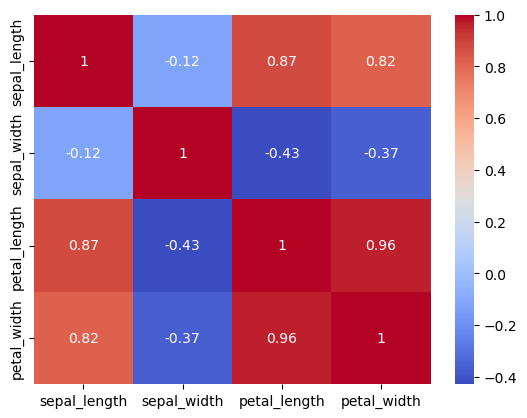

In [32]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
# annot=True: 각 셀에 숫자(상관계수)를 표시
# cmap='coolwarm': 색상 맵 지정. 양의 상관은 붉은색, 음의 상관은 푸른색 계열로 표시

## 실습 문제 3.1: 동전 던지기 시뮬레이션 함수 구현하기

**설명**: 이론적으로 공정한 동전의 앞면이 나올 확률은 50%이지만, 실제 실험에서는 정확히 일치하지 않을 수 있습니다. **시뮬레이션**은 이러한 무작위 실험을 컴퓨터로 수없이 반복하여, 그 결과인 **실험적 확률**이 이론적 확률에 어떻게 근접하는지 관찰하는 강력한 방법입니다. 주어진 횟수만큼 동전을 던지고 그 결과를 반환하는 함수를 직접 구현해 봅시다.

$$P(\text{사건}) = \frac{\text{해당 사건이 발생한 횟수}}{\text{전체 실험 횟수}}$$

**요구사항**:

  - `simulate_coin_tosses` 함수를 완성하세요.
  - 함수 내에서 `num_tosses` 만큼 동전 던지기를 시뮬레이션하세요. (e.g., 0은 뒷면, 1은 앞면)
  - 시뮬레이션 결과에서 앞면과 뒷면이 나온 횟수를 각각 계산하세요.
  - 계산된 `앞면 횟수`, `뒷면 횟수`, 그리고 전체 `던지기 결과 배열`을 튜플(tuple) 형태로 반환하세요.


In [ ]:
def simulate_coin_tosses(num_tosses: int) -> tuple[int, int, np.ndarray]:
  """
  주어진 횟수만큼 동전 던지기를 시뮬레이션하고 결과를 반환합니다.

  Args:
    num_tosses: 총 던지기 횟수

  Returns:
    (앞면 횟수, 뒷면 횟수, 전체 던지기 결과 배열)을 담은 튜플
  """
  np.random.randint(0,2,)

In [ ]:

n_simulations = 100
heads, tails, results = simulate_coin_tosses(n_simulations)

prob_heads = heads / n_simulations
prob_tails = tails / n_simulations

print(f"총 던진 횟수: {n_simulations}")
print(f"앞면이 나온 횟수: {heads}, 실험적 확률: {prob_heads:.2f}")
print(f"뒷면이 나온 횟수: {tails}, 실험적 확률: {prob_tails:.2f}")

In [ ]:
#그래프

## 실습 문제 3.2: 두 주사위 합의 확률 분포 시뮬레이션

**설명**: 두 사건이 서로에게 영향을 주지 않을 때, 이를 \*\*독립 사건(Independent Events)\*\*이라고 합니다. 두 개의 공정한 주사위를 던질 때, 첫 번째 주사위의 결과와 두 번째 주사위의 결과는 서로 독립입니다. 따라서 두 사건이 동시에 발생할 확률은 각 사건의 확률을 곱하여 계산할 수 있습니다.

이번 실습에서는 두 개의 주사위를 던져 나오는 두 눈의 합을 시뮬레이션합니다. 이 시뮬레이션을 통해 각 합계(2부터 12까지)가 나타나는 실험적 확률 분포를 계산하고, 이론적 확률 분포와 어떻게 유사한지 시각적으로 비교해 봅니다.

$$P(A \cap B) = P(A) \cdot P(B)$$

**요구사항**:

  - `simulate_dice_rolls` 함수를 완성하세요.
  - 함수 내에서 `num_rolls` 횟수만큼 두 개의 주사위를 던지는 것을 시뮬레이션하세요.
  - 각 시행마다 두 주사위의 눈을 합산하여, 모든 합계가 담긴 배열을 생성하세요.
  - 최종적으로, 계산된 합계들의 배열을 반환하세요.




In [33]:
def simulate_dice_rolls(num_rolls: int) -> np.ndarray:
  """
  주어진 횟수만큼 두 개의 주사위를 던져 두 눈의 합을 시뮬레이션합니다.

  Args:
    num_rolls: 총 던지기 횟수

  Returns:
    각 시행에서 나온 두 주사위 눈의 합계가 담긴 numpy 배열
  """
  d1 = np.random.randint(1,7,num_rolls)
  d2 = np.random.randint(1,7,num_rolls)
  return d1+d2


In [34]:

n_simulations = 1000
roll_sums = simulate_dice_rolls(n_simulations)

# pd.Series.value_counts()를 이용해 각 합계의 빈도를 계산하고 정렬
value_counts = pd.Series(roll_sums).value_counts().sort_index()
probabilities = value_counts / n_simulations

print(f"--- {n_simulations}번 던지기 시뮬레이션 결과 ---")
print("각 합계의 빈도:")
print(value_counts)
print("\n각 합계의 실험적 확률:")
print(probabilities)

--- 1000번 던지기 시뮬레이션 결과 ---
각 합계의 빈도:
2      25
3      65
4      84
5     103
6     142
7     180
8     144
9     114
10     66
11     53
12     24
Name: count, dtype: int64

각 합계의 실험적 확률:
2     0.025
3     0.065
4     0.084
5     0.103
6     0.142
7     0.180
8     0.144
9     0.114
10    0.066
11    0.053
12    0.024
Name: count, dtype: float64


In [ ]:
plt.bar

<function matplotlib.pyplot.bar(x: 'float | ArrayLike', height: 'float | ArrayLike', width: 'float | ArrayLike' = 0.8, bottom: 'float | ArrayLike | None' = None, *, align: "Literal['center', 'edge']" = 'center', data=None, **kwargs) -> 'BarContainer'>

## 실습 문제: 조건부 확률과 학생 데이터 분석

**설명**: **조건부 확률**은 특정 사건 B가 일어났다는 조건(정보)이 주어졌을 때, 다른 사건 A가 일어날 확률, 즉 $P(A|B)$를 계산하는 것입니다. 이는 새로운 정보를 바탕으로 특정 사건의 발생 가능성을 어떻게 재평가하는지 이해하는 데 핵심적인 개념입니다. 🧑‍🎓 Pandas를 사용하여 주어진 학생 데이터에서 조건부 확률을 직접 계산하며 데이터 분석의 기초를 다져봅시다.

$$P(A|B) = \frac{P(A \cap B)}{P(B)} = \frac{\text{A와 B가 동시에 일어나는 경우의 수}}{\text{B가 일어나는 경우의 수}}$$

다음과 같은 학생 설문조사 데이터가 있습니다:

| 학생 ID | 전공 | 학년 | 과외활동 참여 |
| --- | --- | --- | --- |
| 1 | 공학 | 1 | Y |
| 2 | 인문 | 2 | N |
| 3 | 공학 | 3 | Y |
| 4 | 상경 | 2 | N |
| 5 | 인문 | 1 | Y |
| 6 | 공학 | 4 | N |
| 7 | 상경 | 3 | Y |
| 8 | 공학 | 2 | Y |

**요구사항**:

  - 제공된 학생 데이터를 Pandas DataFrame으로 생성하세요.
  - 단일 사건의 확률을 계산하는 `calculate_prob` 함수를 완성하세요.
  - 조건부 확률 $P(A|B)$를 계산하는 `calculate_conditional_prob` 함수를 완성하세요. 이 함수는 DataFrame과 두 사건(A, B)의 조건(열, 값)을 인자로 받습니다.
  - 구현한 함수들을 사용하여 문제에 주어진 네 가지 확률을 모두 계산하세요.




In [ ]:

def calculate_prob(df: pd.DataFrame, col: str, val) -> float:
  """
  단일 사건의 확률 P(col=val)을 계산합니다.
  """
  return (df['col']==val)/len(df)

def calculate_conditional_prob(
    df: pd.DataFrame,
    event_a_col: str, event_a_val,
    event_b_col: str, event_b_val
) -> float:
  """
  조건부 확률 P(A|B)를 계산합니다.
  P(event_a | event_b)
  """
  


In [ ]:
data = {
    '학생 ID': [1, 2, 3, 4, 5, 6, 7, 8],
    '전공': ['공학', '인문', '공학', '상경', '인문', '공학', '상경', '공학'],
    '학년': [1, 2, 3, 2, 1, 4, 3, 2],
    '과외활동 참여': ['Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y']
}
student_df = pd.DataFrame(data)

# --- 테스트 코드 ---
# 1. P(전공=공학) 계산
prob_engineering = calculate_prob(student_df, '전공', '공학')
print(f"P(전공=공학): {prob_engineering:.4f}")

# 2. P(과외활동=예) 계산
prob_activity_yes = calculate_prob(student_df, '과외활동 참여', 'Y')
print(f"P(과외활동=예): {prob_activity_yes:.4f}")

# 3. P(전공=공학 | 과외활동=예) 계산
prob_eng_given_activity = calculate_conditional_prob(
    student_df,
    '전공', '공학',
    '과외활동 참여', 'Y'
)
print(f"P(전공=공학 | 과외활동=예): {prob_eng_given_activity:.4f}")

# 4. P(과외활동=예 | 전공=공학) 계산
prob_activity_given_eng = calculate_conditional_prob(
    student_df,
    '과외활동 참여', 'Y',
    '전공', '공학'
)
print(f"P(과외활동=예 | 전공=공학): {prob_activity_given_eng:.4f}")
